# Tread Lightly - A Code to apply logistic regression to the ZFIRE kinematic dataset
Named after the Mastodon song, Tread Lightly, off of the album Once More 'Round the Sun:
Open your eyes
Take a deep breath and return to life
Wake up and fight
Fight for the love and the burning light

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [14]:
galaxies = pd.read_table('zfire_recovered090517_rfix3_MCMC.cat',delim_whitespace=True)
galaxies['diskbin'] = np.where(galaxies.disk == True, 1, 0)
galaxies.head()

,zid,mask,zspec,mass,cluster,disk,sfr,va,va_err,v22,...,j,j_err,sersic,sersic_err,size_e,size_s,size_t,r_ratio,sfr_density,diskbin
0,2765,dec2013_mask1,2.23,10.44,False,False,83.3,199.33,9.53,180.25,...,555.11,25.07,4.00,0.00,2.81,1.41,0.47,0.33,3.36,0
1,3074,dec2013_mask1,2.23,10.19,False,False,-99.0,201.44,19.77,182.16,...,680.27,33.14,1.00,0.00,3.79,2.56,0.85,0.33,-99.00,0
2,3532,dec2013_mask1,2.10,9.40,True,False,9.9,22.59,9.61,20.43,...,23.58,9.36,0.86,0.09,1.67,0.48,0.16,0.33,1.14,0
3,3842,dec2013_mask1,2.10,10.25,True,True,8.8,218.58,23.80,197.65,...,807.28,51.25,0.87,0.04,3.58,2.63,0.88,0.33,0.22,1
4,4655,dec2013_mask1,2.10,9.34,True,True,1.2,116.73,30.26,105.55,...,103.68,19.67,0.59,0.17,0.99,0.58,0.19,0.33,0.39,1


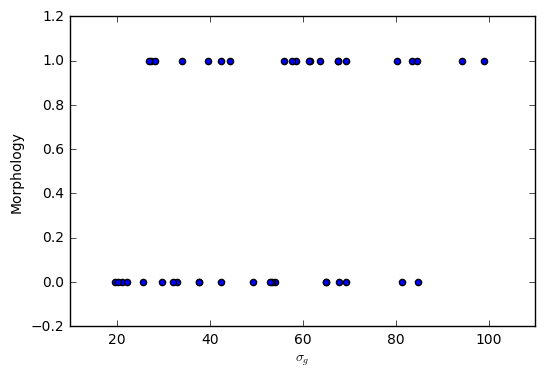

In [17]:
plt.scatter(galaxies.sig, galaxies.diskbin)
plt.xlabel(r'$\sigma_g$')
plt.ylabel('Morphology')

In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['sig']
X = galaxies[feature_cols]
y = galaxies.diskbin
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# make predictions for all values of X
galaxies['morph_pred'] = linreg.predict(X)
galaxies.head()

,zid,mask,zspec,mass,cluster,disk,sfr,va,va_err,v22,...,j_err,sersic,sersic_err,size_e,size_s,size_t,r_ratio,sfr_density,diskbin,morph_pred
0,2765,dec2013_mask1,2.23,10.44,False,False,83.3,199.33,9.53,180.25,...,25.07,4.00,0.00,2.81,1.41,0.47,0.33,3.36,0,0.706997
1,3074,dec2013_mask1,2.23,10.19,False,False,-99.0,201.44,19.77,182.16,...,33.14,1.00,0.00,3.79,2.56,0.85,0.33,-99.00,0,0.588499
2,3532,dec2013_mask1,2.10,9.40,True,False,9.9,22.59,9.61,20.43,...,9.36,0.86,0.09,1.67,0.48,0.16,0.33,1.14,0,0.509284
3,3842,dec2013_mask1,2.10,10.25,True,True,8.8,218.58,23.80,197.65,...,51.25,0.87,0.04,3.58,2.63,0.88,0.33,0.22,1,0.316346
4,4655,dec2013_mask1,2.10,9.34,True,True,1.2,116.73,30.26,105.55,...,19.67,0.59,0.17,0.99,0.58,0.19,0.33,0.39,1,0.323508


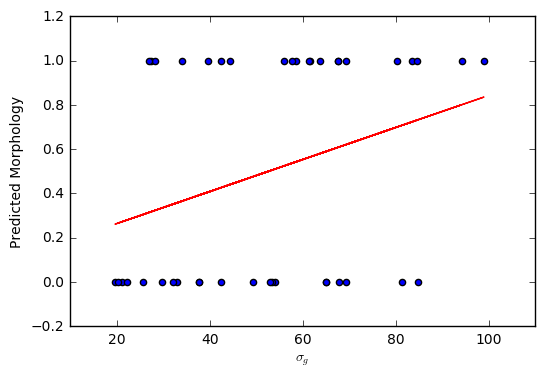

In [23]:
# plot those predictions connected by a line
plt.scatter(galaxies.sig, galaxies.diskbin)
plt.plot(galaxies.sig, galaxies.morph_pred, color='red')
plt.xlabel(r'$\sigma_g$')
plt.ylabel('Predicted Morphology')

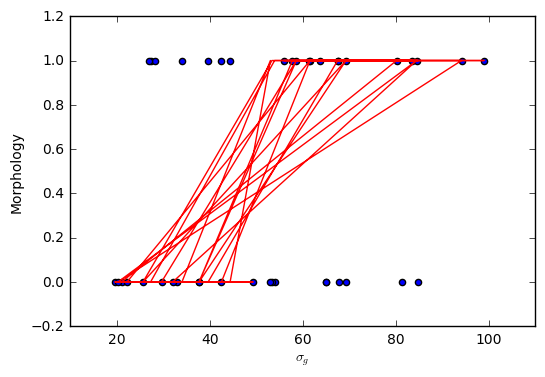

In [25]:
#Using Logistic Regression Instead
#Logistic regression can do what we just did:

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['sig']
X = galaxies[feature_cols]
y = galaxies.diskbin
logreg.fit(X, y)
galaxies['morph_pred_class'] = logreg.predict(X)
plt.scatter(galaxies.sig, galaxies.diskbin)
plt.plot(galaxies.sig, galaxies.morph_pred_class, color='red')
plt.xlabel(r'$\sigma_g$')
plt.ylabel('Morphology')

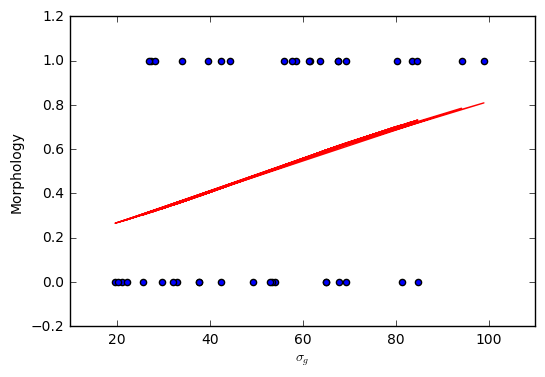

In [26]:
#What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

# store the predicted probabilites of class 1
galaxies['morph_pred_prob'] = logreg.predict_proba(X)[:, 1]
# plot the predicted probabilities
plt.scatter(galaxies.sig, galaxies.diskbin)
plt.plot(galaxies.sig, galaxies.morph_pred_prob, color='red')
plt.xlabel(r'$\sigma_g$')
plt.ylabel('Morphology')

In [28]:
print(logreg.predict_proba(50))
print(logreg.predict_proba(25))
print(logreg.predict_proba(85))

[[ 0.51939651  0.48060349]]
[[ 0.70125972  0.29874028]]
[[ 0.26730773  0.73269227]]
